In [32]:
from skimage import io, data, filters, feature
from skimage.util import crop
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from scipy.ndimage import distance_transform_edt

(303, 384)

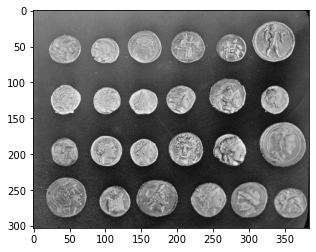

In [48]:
coins = data.coins()
plt.imshow(coins, cmap="gray")
coins.shape

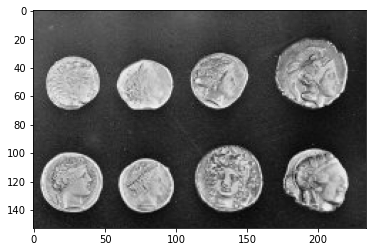

In [50]:
# height = coins.shape[0]
# width = coins.shape[1]
# x1 = 0
# y1 = 0
# x2 = width
# y2 = height

coins_b = crop(coins, ((75, 75)), copy=False)
plt.imshow(coins_b, cmap="gray")